# Gila River Water Rights - Additional Analyses

## Background


## Step 0: Set-up
- Restore variables
- Load libraries

In [1]:
# Restore variables
%store -r

Unable to restore variable 'ndvi_diff', ignoring (use %store -d to forget!)
The error was: <class 'KeyError'>


In [2]:
# Import libraries
from pathlib import Path
from glob import glob

import pandas as pd
import matplotlib.pyplot as plt
import rioxarray as rxr
import xarray as xr
import hvplot.pandas
import hvplot.xarray # interactive plotting using raster data
import zipfile

## Step 1: Load in NLCD land class data
### Note: This data was downloaded from https://www.mrlc.gov/viewer/

In [3]:
# Path containing .zip files
zip_dir = Path("/workspaces/data/gilariverdata/")
out_dir = Path("/workspaces/data/gilariverdata/NLCD_extracted_tifs")
out_dir.mkdir(parents=True, exist_ok=True)

# Extract and store only the .tiffs
for zip_path in zip_dir.glob("NLCD_mil1dydofjyxbs.zip"):
    with zipfile.ZipFile(zip_path, 'r') as z:
        for file in z.namelist():
            if file.lower().endswith(".tiff"):
                print(f"Extracting {file} from {zip_path.name}")
                z.extract(file, path=out_dir)

Extracting Annual_NLCD_LndCov_2001_CU_C1V1_mil1dydofjyxbs.tiff from NLCD_mil1dydofjyxbs.zip
Extracting Annual_NLCD_LndCov_2002_CU_C1V1_mil1dydofjyxbs.tiff from NLCD_mil1dydofjyxbs.zip
Extracting Annual_NLCD_LndCov_2003_CU_C1V1_mil1dydofjyxbs.tiff from NLCD_mil1dydofjyxbs.zip
Extracting Annual_NLCD_LndCov_2004_CU_C1V1_mil1dydofjyxbs.tiff from NLCD_mil1dydofjyxbs.zip
Extracting Annual_NLCD_LndCov_2005_CU_C1V1_mil1dydofjyxbs.tiff from NLCD_mil1dydofjyxbs.zip
Extracting Annual_NLCD_LndCov_2006_CU_C1V1_mil1dydofjyxbs.tiff from NLCD_mil1dydofjyxbs.zip
Extracting Annual_NLCD_LndCov_2007_CU_C1V1_mil1dydofjyxbs.tiff from NLCD_mil1dydofjyxbs.zip
Extracting Annual_NLCD_LndCov_2008_CU_C1V1_mil1dydofjyxbs.tiff from NLCD_mil1dydofjyxbs.zip
Extracting Annual_NLCD_LndCov_2009_CU_C1V1_mil1dydofjyxbs.tiff from NLCD_mil1dydofjyxbs.zip
Extracting Annual_NLCD_LndCov_2010_CU_C1V1_mil1dydofjyxbs.tiff from NLCD_mil1dydofjyxbs.zip
Extracting Annual_NLCD_LndCov_2011_CU_C1V1_mil1dydofjyxbs.tiff from NLCD_mil1dyd

In [ ]:
# Open a test tif (2001)
nlcd_2001_path = out_dir / "Annual_NLCD_LndCov_2001_CU_C1V1_mil1dydofjyxbs.tiff"
nlcd_2001 = rxr.open_rasterio(nlcd_2001_path, mask_and_scale=True).squeeze()

In [5]:
# Check CRS of the nlcd dataset
print("NLCD 2001 CRS:")
print(nlcd_2001.rio.crs)
print("\nGila GDF CRS:")
print(gila_gdf.crs)

NLCD 2001 CRS:
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]

Gila GDF CRS:
EPSG:4269


In [7]:
# Reproject gila_gdf from EPSG:4269 to match NLCD's Albers projection
gila_gdf_reproj = gila_gdf.to_crs(nlcd_2001.rio.crs)

# Check crs
print(f"NLCD CRS: {nlcd_2001.rio.crs}")
print(f"Gila GDF CRS (reprojected): {gila_gdf_reproj.crs}")

NLCD CRS: PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Gila GDF CRS (reprojected): PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAM

In [ ]:
# Plot with boundary
fig, ax = plt.subplots(figsize=(12, 8))
nlcd_2001.plot(ax=ax, cmap='tab20', add_colorbar=True)
gila_gdf_reproj.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=2.5)
ax.set_title('NLCD Land Cover Classes - 2001 (Gila River Area)')
plt.tight_layout()
plt.show()

## Step 2: Create an Ag / non-Ag mask

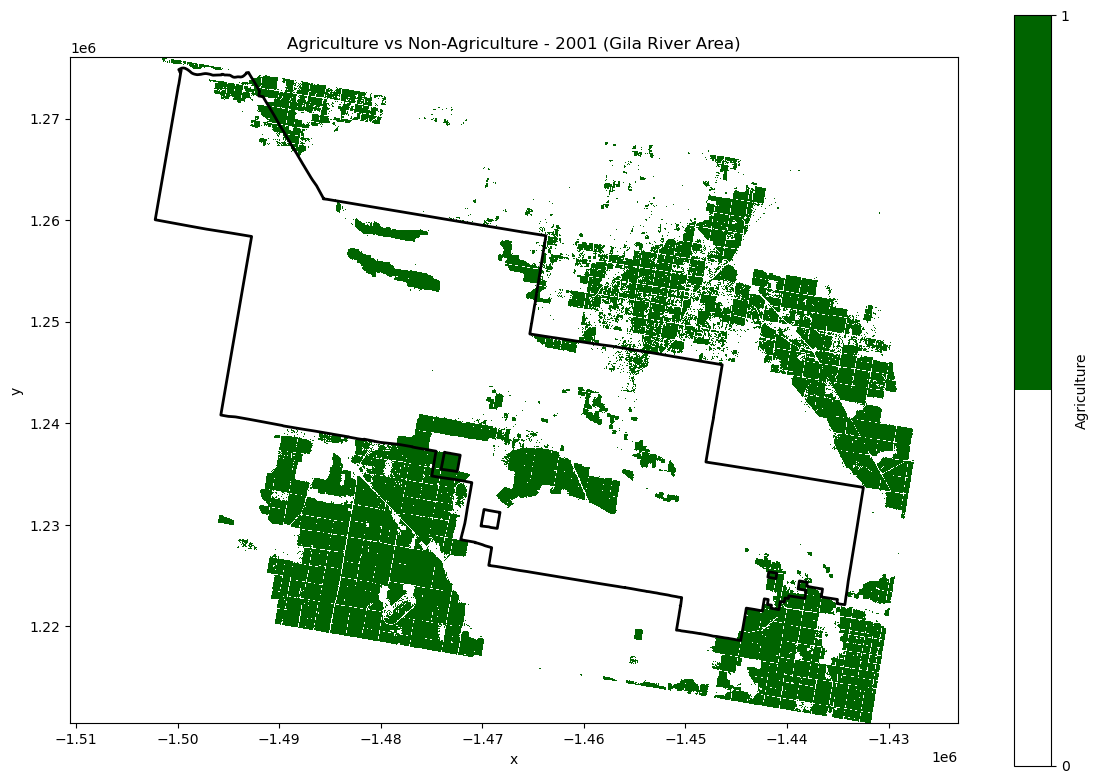

In [8]:
# Create binary agriculture layer (1 = ag, 0 = non-ag)
ag_2001 = xr.where(nlcd_2001 == 82, 1, 0)
ag_2001.name = 'agriculture'

# Create custom colormap: white for non-ag, dark green for ag
from matplotlib.colors import ListedColormap
colors = ['white', 'darkgreen']
cmap = ListedColormap(colors)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
ag_2001.plot(ax=ax, cmap=cmap, add_colorbar=True, 
             vmin=0, vmax=1,
             cbar_kwargs={'label': 'Agriculture', 'ticks': [0, 1]})
gila_gdf_reproj.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=2)
ax.set_title('Agriculture vs Non-Agriculture - 2001 (Gila River Area)')
plt.tight_layout()
plt.show()


## Step 2: Wrangle NLCD class tiff data

In [ ]:
# Get a sorted list of NLCD tif file paths
nlcd_paths = sorted(list(project.project_dir.rglob('*NLCD*.tiff')))

# Display the first and last three files paths to check the pattern
nlcd_paths[:3], nlcd_paths[-3:]

In [ ]:
year_start = -32
year_end = -28

# Loop through each NLCD image
nlcd_das = []
for nlcd_path in nlcd_paths:
    # Get date from file name
    doy = nlcd_path.name[year_start:year_end]
    date = pd.to_datetime(doy, format='%Y')
    
    # Open dataset
    da = rxr.open_rasterio(nlcd_path, mask_and_scale=True).squeeze()

    # Add date dimension and clean up metadata
    da = da.assign_coords({'date': date})
    da = da.expand_dims({'date': 1})
    da.name = 'nlcd'

    # Prepare for concatenation
    nlcd_das.append(da)

# Length of list (aka number of files processed)
len(nlcd_das)

In [ ]:
# Combine NLCD images from all dates
nlcd_da = xr.combine_by_coords(nlcd_das, coords=['date'])

# print
print(nlcd_da)

In [ ]:
# Check unique NLCD class values in the stacked dataset
# Sample a subset to speed up computation (optional)
unique_values = np.unique(nlcd_da['nlcd'].values[~np.isnan(nlcd_da['nlcd'].values)])
print(f"Unique NLCD class values found: {sorted(unique_values)}")
print(f"\nTotal number of unique classes: {len(unique_values)}")

# Check if class 82 (cultivated crops) is present
if 82 in unique_values:
    print("\n✓ Class 82 (Cultivated Crops) is present in the dataset!")
else:
    print("\n✗ WARNING: Class 82 (Cultivated Crops) NOT found in the dataset!")

In [ ]:
# Plot first and last NLCD tif side by side

# Define first and last image
nlcd_2001 = rxr.open_rasterio(nlcd_paths[-1], mask_and_scale=True).squeeze()
nlcd_2022 = rxr.open_rasterio(nlcd_paths[0], mask_and_scale=True).squeeze()

# Create side by side plot
fig, axes = plt.subplots(1, 2, figsize =(12,4))


# Plot each in their own axes

# First NLCD 
first_nlcd.plot(ax=axes[0], cmap=plt.cm.PiYG, vmin=-1,vmax=1)
# Plot boundary
gila_gdf.plot(ax=axes[0], edgecolor='black', 
              facecolor='none', linewidth=2)
axes[0].set_title("NLCD - Gila River 2001")

# Recent NDVI
recent_ndvi.plot(ax=axes[1], cmap=plt.cm.PiYG, vmin=-1,vmax=1)
# Plot boundary
gila_gdf.plot(ax=axes[1], edgecolor='black', 
              facecolor='none', linewidth=2)
axes[1].set_title("NDVI - Gila River 2022")